# Zomato dataset

# Description


This dataset is a collection of restaurants that are registered on Zomato in Bengaluru City. 
In this dataset, we have more than 50000 rows and 17 columns

 0   url              - url of restaurant            
 1   address          - address for particular restaurant            
 2   name             - name of restaurant           
 3   online_order     - online_order is applicable for that restaurant or not            
 5   rate             - rating for particular restaurant on zomato   ,Number of people gave rating           
 6   votes            - no. of votes ,Number of people gave rating           
 7   phone            - phone no. restaurant           
 8   location         - at which loaction that restaurant is located            
 9   rest_type        - Restaurant Type(Casual Dining/Cafe/Quick           
 10  dish_liked       - dishes most people liked           
 11  cuisines         - Cuisines served by restaurant            
 12  approx_cost(for two people)  - cost of 2 people in diff restaurant
 13  reviews_list     - review given by customer            
 14  menu_item        - menu in restaurant            
 15  listed_in(type)  - Category of restaurant(Delivery/ Dine-Out/Buffet etc...)            
 16  listed_in(city)  - location

In [ ]:

Category of restaurant(Delivery/ Dine-Out/Buffet etc...)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import  train_test_split

In [3]:
data=pd.read_csv("D:/DATASET/zomato.csv")

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
# shape of data 

data.shape

(51717, 17)

In [7]:
# checking information about the data(null value, datatype)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Checking null values 

data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### It shows that there are null values in these column
 - 'rate' 
 - 'phone' 
 - 'location ' 
 - 'rest_type' 
 - 'dish_liked ' 
 - 'dish_liked  ' 
 - 'approx_cost(for two people)'
 
 
 
 ### intitially most of the data type are object type, except 'votes'
 
 

In [9]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']


1) As we see that there are 16 categorical features and only 1 numeric feature.

2) but by observing dataset we can infer that there are some features that are not actualy categorical so we have to perform encoding to convert them into numerical features, we will se them later.

In [10]:
# name of all columns

data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
col=["url","address","phone","reviews_list","menu_item"]
for i in col:
    print(data[i].head(10))
    print('*'*100)

0    https://www.zomato.com/bangalore/jalsa-banasha...
1    https://www.zomato.com/bangalore/spice-elephan...
2    https://www.zomato.com/SanchurroBangalore?cont...
3    https://www.zomato.com/bangalore/addhuri-udupi...
4    https://www.zomato.com/bangalore/grand-village...
5    https://www.zomato.com/bangalore/timepass-dinn...
6    https://www.zomato.com/bangalore/rosewood-inte...
7    https://www.zomato.com/bangalore/onesta-banash...
8    https://www.zomato.com/bangalore/penthouse-caf...
9    https://www.zomato.com/bangalore/smacznego-ban...
Name: url, dtype: object
****************************************************************************************************
0    942, 21st Main Road, 2nd Stage, Banashankari, ...
1    2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...
2    1112, Next to KIMS Medical College, 17th Cross...
3    1st Floor, Annakuteera, 3rd Stage, Banashankar...
4    10, 3rd Floor, Lakshmi Associates, Gandhi Baza...
5    37, 5-1, 4th Floor, Bosco Court, Gandhi Baza

### after understanding of dataset , there are some columns which dont have much significance while analysis, so that it is better to drop these column :-

- url
- address
- phone
- reviews_list
- menu_item


In [12]:
# droping column

data.drop(columns=["url","address","phone","reviews_list","menu_item"],inplace=True)


In [13]:
# head of data

data.head()



,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
# making data copy

zomato=data.copy()

In [15]:
zomato.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari


# cleaning data

In [16]:
zomato.shape

(51717, 12)

In [17]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [18]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# no. of unique values are:-

In [19]:
for feature in zomato.columns:
   
    print('number of unique values in {}  are :-  {}'.format(feature,zomato[feature].nunique()))
    
    print()

    print('*'*50)
    print()
    

number of unique values in name  are :-  8792

**************************************************

number of unique values in online_order  are :-  2

**************************************************

number of unique values in book_table  are :-  2

**************************************************

number of unique values in rate  are :-  64

**************************************************

number of unique values in votes  are :-  2328

**************************************************

number of unique values in location  are :-  93

**************************************************

number of unique values in rest_type  are :-  93

**************************************************

number of unique values in dish_liked  are :-  5271

**************************************************

number of unique values in cuisines  are :-  2723

**************************************************

number of unique values in approx_cost(for two people)  are :-  70

*******************

# unique value are:-

In [20]:
for feature in zomato.columns:
  
    if zomato[feature].nunique() < 100:
        print('number of unique values in {}  are :-  {}'.format(feature,zomato[feature].nunique()))
        print('unique values in {}  are :-  {}'.format(feature,zomato[feature].unique()))
   
        print('*'*50)
        print()
    

number of unique values in online_order  are :-  2
unique values in online_order  are :-  ['Yes' 'No']
**************************************************

number of unique values in book_table  are :-  2
unique values in book_table  are :-  ['Yes' 'No']
**************************************************

number of unique values in rate  are :-  64
unique values in rate  are :-  ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
**************************************************

number of unique 

In [21]:
# checking duplicate

In [22]:
# in our data set 371 value are duplicate value

zomato.duplicated().sum()

108

In [23]:
# droping duplicat value

zomato = zomato.drop_duplicates()

In [24]:
# now we dont have duplicate value

zomato.duplicated().sum()

0

In [25]:
zomato.shape

# earlier we have 51717 rows

(51609, 12)

In [26]:
# checking null value


In [27]:
zomato.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7755
votes                              0
location                          21
rest_type                        227
dish_liked                     28014
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

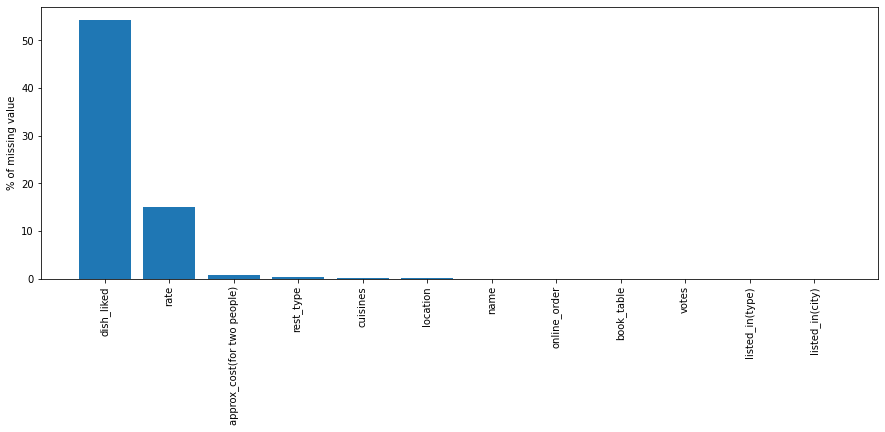

In [28]:
fig, ax = plt.subplots(figsize=(15,5))

missing = zomato.isna().sum().div(zomato.shape[0]).mul(100).to_frame().sort_values(by=0,ascending = False)

ax.bar(missing.index, missing.values.T[0])

plt.xticks([i for i in range(len(zomato.columns))],rotation='vertical')
plt.ylabel('% of missing value')
plt.show()

In [29]:
dropcols = missing[missing[0]>50]
dropcols

,0
dish_liked,54.28123


In [30]:
# dish_liked column has more than 50 % of data is missing. so that removing the dish_liked column

In [31]:
zomato.drop(['dish_liked'],axis=1,inplace =True)

In [32]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


# working on online_order

In [33]:
zomato['online_order'].value_counts()

Yes    30361
No     21248
Name: online_order, dtype: int64

In [34]:
zomato['online_order'].isnull().sum()

0

In [35]:
# percentage of yes and no in online_order column

round(zomato['online_order'].value_counts().div(zomato.shape[0]).mul(100),2)

Yes    58.83
No     41.17
Name: online_order, dtype: float64

In [36]:
# changing datatype

zomato['online_order']=zomato['online_order'].astype('category')

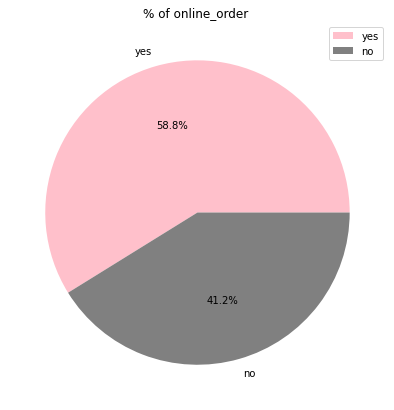

In [37]:


plt.figure(figsize=(10,7))
l=['yes','no']

plt.pie(zomato["online_order"].value_counts(),labels=l,autopct='%0.1f%%',colors=['pink','grey'])
plt.legend(loc='best')
plt.title('% of online_order ')
plt.show()

# working on book_table

In [38]:
zomato['book_table'].value_counts()

No     45193
Yes     6416
Name: book_table, dtype: int64

In [39]:
zomato['book_table'].isnull().sum()

0

In [40]:
# percentage of yes and no in online_order column

round(zomato['book_table'].value_counts().div(zomato.shape[0]).mul(100),2)

No     87.57
Yes    12.43
Name: book_table, dtype: float64

In [41]:
# canging data type

zomato['book_table']=zomato['book_table'].astype('category')

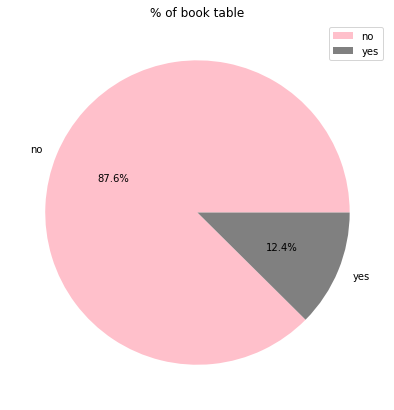

In [42]:

plt.figure(figsize=(10,7))
l=['no','yes']
plt.pie(zomato["book_table"].value_counts(),labels=l,autopct='%0.1f%%',colors=['pink','grey'])
plt.legend(loc='best')
plt.title('% of book table')
plt.show()


# working on rate column

In [43]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [44]:
zomato['rate'].head(10)

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
5    3.8/5
6    3.6/5
7    4.6/5
8    4.0/5
9    4.2/5
Name: rate, dtype: object

In [45]:
zomato['rate'].isnull().sum()

7755

In [46]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [47]:
# there are some special charachters

# 'NEW',nan,'-'

In [48]:
def modify(rating):

    if(rating=="NEW" or rating=="-"):
        return np.nan

    else:
        rating=str(rating).split('/')
        rating=rating[0]
        return float(rating)
    
zomato["rate"]=zomato["rate"].apply(modify)
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [49]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [50]:
zomato['rate'].isnull().sum()

10019

In [51]:
# filling the missing value of 'rate' column with mean of 'rate' column

zomato['rate'].fillna(zomato['rate'].mean(), inplace= True)

In [52]:
zomato['rate'].isnull().sum()

0

Text(0.5, 1.0, 'Relationship between online order and rate')

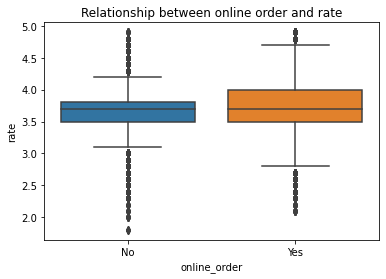

In [53]:
#visualizing mode of order vs rate
plt.figure()
sns.boxplot(x=zomato['online_order'],y=zomato['rate'])
plt.title("Relationship between online order and rate")

# Dropping all the missing value

In [54]:
zomato.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [55]:
zomato.dropna(inplace=True)
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# working on votes   columns

In [56]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [57]:
zomato['votes'].sample(10)

39257       0
412       128
12371       0
11492      15
21251       0
17402      33
12929      25
2491       74
30455      20
45360    1799
Name: votes, dtype: int64

In [58]:
x=zomato["votes"]
fig=px.histogram(zomato,x=x,title="VOTES")
fig.show()

# location

In [59]:
zomato.groupby('location').sum()['votes'].sort_values(ascending=False).head(10)

location
Koramangala 5th Block    2214083
Indiranagar              1165909
Koramangala 4th Block     685156
Church Street             590306
JP Nagar                  586522
BTM                       573668
HSR                       498322
Lavelle Road              495777
Koramangala 7th Block     488225
Jayanagar                 487044
Name: votes, dtype: int64

In [60]:
y=zomato.groupby('location').sum()['votes'].sort_values(ascending=False).head(10)
x=y.index
fig=px.bar(x=x,y=y,labels={"x":"Top 10 locations","y":"no of votes"},title="Top 10 loacation as per votes")
fig.show()

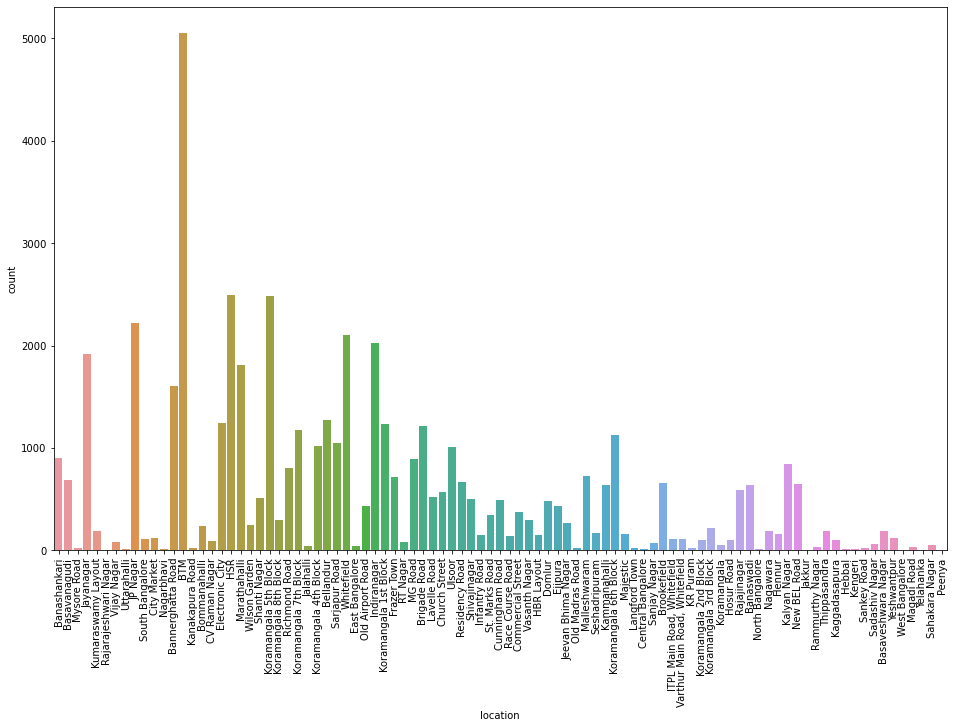

In [61]:
plt.figure(figsize=(16,10))
ax=sns.countplot(x=zomato['location'])
plt.xticks(rotation=90)
plt.show()

# max no. of restrurent is in the BTM location

# name

In [62]:
y=zomato.groupby('name').max()['votes'].sort_values(ascending=False).head(10)
x=y.index
fig=px.bar(x=x,y=y,labels={"x":"Top 10 restrurent","y":"no of votes"},title="Top 10 restrurent as per votes")
fig.show()

# working on rest type column

In [63]:
zomato["rest_type"].nunique()

93

In [64]:
zomato['rest_type'].value_counts(ascending = False) 


Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [65]:
# some of rest_type value are 1,2,4
# and many of the restruarant rest_type is value counts is less then 300
# clubing all the restruarant rest_type column whose value count is less then 300

In [66]:
rest_types_300=zomato['rest_type'].value_counts()[(zomato['rest_type'].value_counts(ascending = False) ) < 300]
rest_types_300

Beverage Shop, Quick Bites    293
Bakery, Quick Bites           286
Mess                          264
Pub, Casual Dining            255
Sweet Shop, Quick Bites       178
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 76, dtype: int64

In [67]:
def others(value):
    if value in rest_types_300:
        return 'others'
    else:
        return value
    

zomato['rest_type']=zomato['rest_type'].apply(others)
zomato['rest_type'].value_counts()
    

Quick Bites            19010
Casual Dining          10253
others                  4553
Cafe                    3682
Delivery                2574
Dessert Parlor          2242
Takeaway, Delivery      2008
Bakery                  1140
Casual Dining, Bar      1130
Beverage Shop            863
Bar                      686
Food Court               616
Sweet Shop               468
Bar, Casual Dining       411
Lounge                   395
Pub                      355
Fine Dining              345
Casual Dining, Cafe      311
Name: rest_type, dtype: int64

In [68]:
y=zomato["rest_type"].value_counts()[:15]
x=y.index
fig=px.bar(x=x,y=y,labels={"x":"Restaurant Types","y":"Number of Restaurant Types"},title="Restaurant Types")
fig.show()

# cuisine

In [69]:
zomato['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [70]:
x=zomato["cuisines"].value_counts()[:10].sort_values()
y=x.index
fig=px.bar(x=x,y=y,labels={"y":"Cuisines","x":"Number of Cuisines"},title="Cuisines")
fig.show()

Observation =

1) Most of the food items in restaurants are north indan types.

2) then north indian chinese is 2nd most favourable cuisine

3) Also there are lot of such styles of cooking presents which having less in numbers


# working on listed_in(type)

In [71]:
# renaming 'listed_intype' and 'approx_cost(for two people) '

In [72]:
zomato.rename(columns={"listed_in(type)":'service type','approx_cost(for two people)' : 'cost'},inplace=True)

In [73]:
zomato["service type"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [74]:
zomato["service type"].isnull().sum()

0

In [75]:
zomato['service type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: service type, dtype: int64

In [76]:
#checking data type
zomato['service type'].dtypes

dtype('O')

In [77]:
zomato['service type']=zomato['service type'].astype('category')

In [78]:
x=zomato["service type"].value_counts().sort_values()
y=x.index
fig=px.bar(x=x,y=y,labels={"y":"Service Type","x":"Number of Service Type"},title="Service Type")
fig.show()

# working on cost column

In [79]:
zomato['cost'].sample(10)

37760    650
22077    450
48944    200
225      400
47849    300
48034    450
34922    400
13892    150
33379    500
36520    300
Name: cost, dtype: object

In [80]:
def modify(cost):
    cost=str(cost)
    if ',' in cost:
        cost= cost.replace(',','')
        return float(cost)
    else:
        return float(cost)

zomato['cost'] = zomato['cost'].apply(modify)
zomato['cost'].sample(10)

4752      250.0
20197    1200.0
35680     700.0
14690     400.0
8403      400.0
13900     200.0
45098     300.0
48873     400.0
49312     600.0
41496     600.0
Name: cost, dtype: float64

In [81]:
zomato['cost'].isnull().sum()

0

In [82]:
zomato['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [83]:
zomato['cost'].fillna(zomato['cost'].mean(),inplace=True)



In [84]:
zomato['cost'].isnull().sum()

0

In [85]:
zomato.groupby('name').max()['cost'].sort_values(ascending=False).head(10)

name
Le Cirque Signature - The Leela Palace    6000.0
Royal Afghan - ITC Windsor                5000.0
Malties - Radisson Blu                    4500.0
La Brasserie - Le Meridien                4100.0
Dakshin - ITC Windsor                     4000.0
Alba - JW Marriott Bengaluru              4000.0
Edo Restaurant & Bar - ITC Gardenia       4000.0
Dum Pukht Jolly Nabobs - ITC Windsor      4000.0
Riwaz - The Ritz-Carlton                  4000.0
Grill 99 - The Ritz-Carlton               4000.0
Name: cost, dtype: float64

In [86]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,service type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [87]:
y=zomato.groupby('name').max()['cost'].sort_values(ascending=False).head(15)
x=y.index
fig=px.bar(x=x,y=y,labels={"x":"restaurant name","y":"cost for 2 people"},title="cost of 2 people in restaurant")
fig.show()


# 15 top most costlier restaurant

In [88]:
# droping name column

In [89]:
zomato.drop(columns=['name'],inplace=True)

In [90]:
zomato.drop(columns=['listed_in(city)'],inplace=True)

In [91]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   online_order  51042 non-null  category
 1   book_table    51042 non-null  category
 2   rate          51042 non-null  float64 
 3   votes         51042 non-null  int64   
 4   location      51042 non-null  object  
 5   rest_type     51042 non-null  object  
 6   cuisines      51042 non-null  object  
 7   cost          51042 non-null  float64 
 8   service type  51042 non-null  category
dtypes: category(3), float64(2), int64(1), object(3)
memory usage: 2.9+ MB


In [92]:
label_encoder=LabelEncoder()

zomato["location"]=label_encoder.fit_transform(zomato["location"])

zomato["cuisines"]=label_encoder.fit_transform(zomato["cuisines"])


# splitting data set

In [93]:
y=zomato["rate"]
x=zomato.drop(["rate"],axis=1)
print("Shape of y:",y.shape)
print("Shape of x:",x.shape)

Shape of y: (51042,)
Shape of x: (51042, 8)


In [94]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [95]:
X_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,service type
45410,No,No,0,82,Quick Bites,1811,200.0,Delivery
37058,No,No,4,45,Quick Bites,2239,300.0,Dine-out
27149,Yes,No,36,46,Quick Bites,2342,300.0,Delivery
38796,Yes,No,59,14,Sweet Shop,1337,300.0,Dine-out
10666,Yes,No,24,0,Quick Bites,1249,350.0,Dine-out


In [96]:
y_train.shape

(40833,)

In [97]:
# using one hot encoder and label encoder

In [98]:
# online order and book table  - yes and no
# location 93
# rest type - 18
# cuisine - 2712
# service type - 7


In [99]:
ohe= OneHotEncoder()

In [100]:
ohe = OneHotEncoder(drop='first')

X_train= ohe.fit_transform(X_train[['online_order','book_table','service type','rest_type']]).toarray()
X_test= ohe.transform(X_test[['online_order','book_table','service type','rest_type']]).toarray()